In [1]:
dir = r"D:\BaiduNetdiskDownload\中国专利数据库1985-2025.2\分年份保存数据"


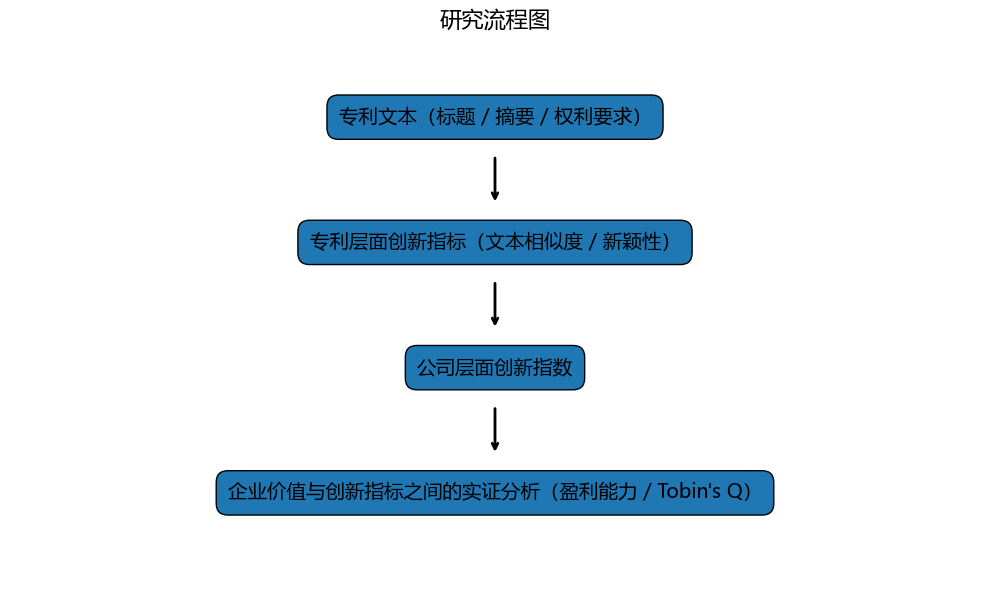

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 1) 自动找一个可用的中文字体（不同系统字体名不一样）
cjk_candidates = [
    "Microsoft YaHei", "SimHei", "PingFang SC", "Hiragino Sans GB",
    "Noto Sans CJK SC", "Source Han Sans SC", "WenQuanYi Zen Hei",
    "Arial Unicode MS"
]

available_fonts = {f.name for f in fm.fontManager.ttflist}
chosen = next((f for f in cjk_candidates if f in available_fonts), None)

if chosen:
    plt.rcParams["font.sans-serif"] = [chosen]
    plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
else:
    print("⚠️ 未检测到常见中文字体，将用英文渲染（不影响出图）。")

# 2) 绘制流程图（竖向 4 步）
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis("off")

steps = [
    "专利文本（标题 / 摘要 / 权利要求）",
    "专利层面创新指标（文本相似度 / 新颖性）",
    "公司层面创新指数",
    "企业价值与创新指标之间的实证分析（盈利能力 / Tobin's Q）"
]

ys = [8.5, 6.2, 3.9, 1.6]
for i, (text, y) in enumerate(zip(steps, ys)):
    ax.text(
        5, y, text,
        ha="center", va="center", fontsize=14,
        bbox=dict(boxstyle="round,pad=0.6")
    )
    if i < len(ys) - 1:
        ax.annotate("", xy=(5, ys[i+1] + 0.7), xytext=(5, y - 0.7),
                    arrowprops=dict(arrowstyle="->", linewidth=2))

title = "研究流程图"
if not chosen:
    title = "Research Pipeline (fallback)"
ax.set_title(title, fontsize=16)

plt.tight_layout()
plt.show()